In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Use formula w=inverse(x^t.x).x.y
def CalculateW(x,y):
    tmpCal=np.dot(x.T,x)
    tmpCal=np.linalg.inv(tmpCal)
   
    tmpCal1=np.dot(x.T,y)
    tmpCal=np.dot(tmpCal,tmpCal1)
    return tmpCal

#calculate mean squared error
#formula =1/n * summation (yi-w^Txi)^2
def CalculateMeanSquaredError(x,y,w):
    size=x.shape[0]
    yi=np.dot(w,x.T)
    diff=np.subtract(y,yi)
    sqrError=(1/size)*np.dot(diff.T,diff)
    return sqrError

#Predict the output label using the model
# yi=w^Tx
def PredictorFunc(w,x):
    tmpY=0
    sizew=w.shape[0]-1
    itr=0
    while sizew>= 0:
        tmpY=tmpY+w[sizew]*(x**sizew)
        sizew=sizew-1
        
    return tmpY

def polynomialFunc(w):
    function=""
    sizew=w.shape[0]-1
    
    itr=0
    while sizew>= 0:
        function=function+"+"+str(w[sizew])+"(x^"+str(sizew)+")"
        sizew=sizew-1
    function.strip('+')  
    return function


#plot scatter curve to show predicted and actual result
def plotPredictedAndActualResult(w,x_data,y_data,degree,error):
    
    plt.title('Plotting on Training data and comparing with Actual output')
    plt.scatter(x_data,y_data,s=20,c='blue',label ='Predicted Result')
    y=np.array([PredictorFunc(w,x) for x in x_data])   
    plt.text(4, 5, 'Squared Error: '+ str('%.3f' % error), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.scatter(x_data,y,s=20,c='red',label ='Actual Result')
    plt.legend( loc ="lower left")
#Plot curve
def plotCurve(w,x_train,y_train,degree,error):

    #Plot a curve to fit training data
    plt.figure()
    plt.scatter(x_train,y_train,s=2,c='blue')
    modelXAxis=np.arange(start=0, stop=10, step=.1)
    predict_y=np.array([PredictorFunc(w,x) for x in modelXAxis])
    plt.title('Plotting on Training data')
    plt.text(4, 5, 'Squared Error: '+ str('%.3f' % error), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.plot(modelXAxis, predict_y, '-r')
    
  
    
 #Plot curve for test data
def plotCurveOnTestData(w,x_test,y_test,degree):
    error=CalculateMeanSquaredErrorTestData(x_test,y_test,w)
    plt.figure()
    modelXAxis=np.arange(start=0, stop=10, step=.1)
    
    y=np.array([PredictorFunc(w,x) for x in modelXAxis])
    plt.title('Plotting on test data')
    plt.scatter(x_test,y_test,s=10,c='blue')
    plt.text(4, 5, 'Squared Error: '+ str('%.3f' % error), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    
    
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.plot(modelXAxis, y, '-r')
    
    plt.figure()
    plotPredictedAndActualResult(w,x_test,y_test,degree,error)
    
 #Plot curve for Ridge Regression
def plotCurveForRidgeRegression(w,x_train,y_train,x_test,y_test,degree,lamda):
    #error=CalculateMeanSquaredErrorTestData(x_train,y_train,w)
    plt.figure()
    modelXAxis=np.arange(start=0, stop=10, step=.1)
    
    y=np.array([PredictorFunc(w,x) for x in modelXAxis])
    plt.title('Ridge regression on training data')
    plt.scatter(x_train,y_train,s=10,c='blue')
    plt.text(4, 5, 'λ: '+ str('%.3f' % lamda), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    
    
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.plot(modelXAxis, y, '-r')
    
    #plt.figure()
    #plotPredictedAndActualResult(w,x_test,y_test,degree,error)
      
#mean squared error for test data    
def CalculateMeanSquaredErrorTestData(x_test,y_test,w):
    size=x_test.shape[0]
   
    yi=np.array([PredictorFunc(w,x) for x in x_test])
    
    diff=np.subtract(y_test,yi)
    sqrError=(1/size)*np.dot(diff.T,diff)
    return sqrError


def ReadData():
    train_Data=pd.read_csv("linear_reg_train_data.csv")
    test_Data=pd.read_csv("linear_reg_test_data.csv")
   
   # Split training data into two part .Use few portion as train data other half to validate model
    #df_permutated = train_Data.sample(frac=1)  
    #train_end = int(len(df_permutated)*0.80)
    train_Data_partTraining = train_Data[:int(len(train_Data)*0.8)]
    train_Data_partTesting = train_Data[int(len(train_Data)*0.2):]
    x_train=train_Data_partTraining['x']
    y_train=train_Data_partTraining['y']
    x_train_Validate=train_Data_partTesting['x']
    y_train_Validate=train_Data_partTesting['y']
    x_test=test_Data['x']
    y_test=test_Data['y']
    size=x_train.shape[0]
    return train_Data,test_Data,x_train,y_train,x_test,y_test,size,x_train_Validate,y_train_Validate
    


#Algorithm for ridge regression
#W = (xᵗx + λI)-¹ xᵗY
#cost function 1/n{(Y - W^Tx)ᵗ(Y - W^Tx)} + λ Δ{WᵗW}
def  ridgeRegression(w_input,x_train,y_train,x_validate,y_validate):
    size=x_train.shape[0]
   # x=np.ones((size,1))
    Max_Iteration=100
    lamda=0
    itr=0
    finalLamda=0
    error=10000
    W=None
    
    while itr<Max_Iteration:
        lamda=lamda+.05
        itr=itr+1
        tmpCostFunc=np.dot(w_input,x_train.T)
        tmpCostFunc=np.subtract(y_train,tmpCostFunc)
        tmpCostFunc=np.dot(tmpCostFunc.T,tmpCostFunc)
        tmpCostFunc=(1/size)*tmpCostFunc
        Regularizer=lamda*np.dot(w_input.T,w_input)
        error=np.add(tmpCostFunc,Regularizer)
        
        
        #tmpW=np.dot(x_train,x_train.T)
        #size=tmpW.shape[0]
        #tmpW=np.add(tmpW,lamda*np.identity(size))
        #tmpW=np.linalg.inv(tmpW)        
        #tmpW=np.dot(tmpW,x_train)
        #tmpW=np.dot(tmpW.T,y_train)
        #newError=CalculateMeanSquaredErrorTestData(x_validate,y_validate,tmpW)
        
        if(newerror<error):
            error=newerror
            finalLamda=lamda
    return finalLamda


#cost function in ridge regression
#cost function 1/n{(Y - W^Tx)ᵗ(Y - W^Tx)} + λ Δ{WᵗW}
def  CostFunction(l,x_validate,y_validate,w_input):
    size=x_validate.shape[0]
    # yi=w^Tx
    
    yi=np.dot(w_input,x_validate.T)
    yi=np.array(yi.T)
    print('yi')
    print(yi.shape[0])
    print(yi.shape[1])
    print('y_validate')
    y_validate=np.asmatrix(y_validate)
    y_validate=y_validate.T
    print(y_validate.shape[0])
    print(y_validate.shape[1])
   # x=np.ones((size,1))
    tmpCostFunc=np.subtract(y_validate,yi)
    
    tmpCostFunc=np.dot(tmpCostFunc.T,tmpCostFunc)
    
    tmpCostFunc=(1/size)*tmpCostFunc
    print('tmpCostFunc')
    print(tmpCostFunc)
    print('w_input')
    print(w_input)
    Regularizer=l*np.dot(w_input,w_input.T)
    print('Regularizer')
    print(Regularizer)
    error=np.add(tmpCostFunc,Regularizer)
    print('error')
    print(error)
    return error

#Algorithm for ridge regression
#W = (xᵗx + λI)-¹ xᵗY
def FindWByRidgeRegression(lamda,x_train,y_train):
    tmpW=np.dot(x_train.T,x_train)
    y=np.asmatrix(y_train)
    
    tmpW=np.add(tmpW,lamda*np.identity(tmpW.shape[0]))
    
    tmpW=np.linalg.inv(tmpW) 
    tmpW=np.asmatrix(tmpW)
   
    
    tmpy=np.dot(y,np.array(x_train))
    tmpy=np.asmatrix(tmpy)

    tmpW=np.matmul(tmpy,tmpW)
    tmpW=np.asmatrix(tmpW)
   
    return tmpW
        

.................................
Observations For  Fitting
.................................
 Degree Polynomial:3
 Function:+0.11276404630267867(x^3)+-1.7162937329629635(x^2)+6.0182925910397955(x^1)+-0.975347947421703(x^0)
.................................


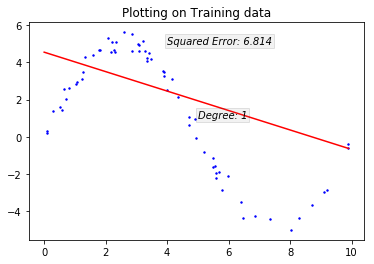

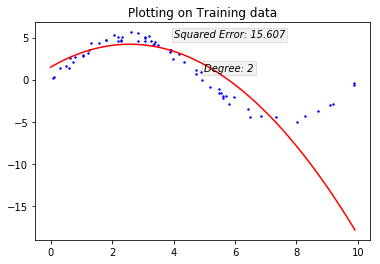

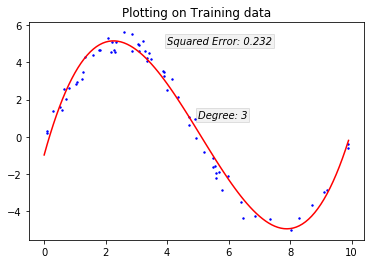

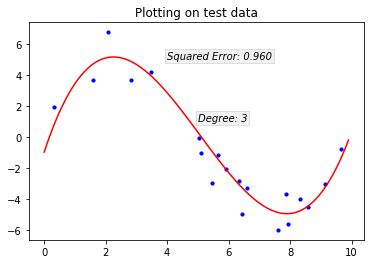

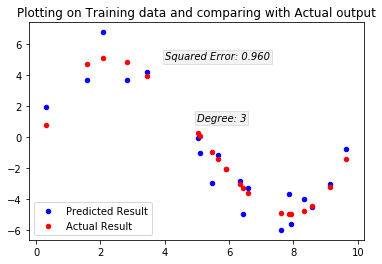

In [8]:


#Question 1.(a)
#Read  data
train_Data,test_Data,x_train,y_train,x_test,y_test,size,x_train_validate,y_train_validate=ReadData()
#Read data for x
size=x_train.shape[0]
x=np.ones((size,1))

#read data for Y
train_y=np.array(y_train)

MAX_DEGREE=size
degree=1;
oldError=100
w=None
testerror=None
while degree<MAX_DEGREE:
    x1=np.array(x_train)**degree
    x= np.concatenate((x,np.reshape(x1,(x1.shape[0],1))),axis=1)
    w=CalculateW(x,y_train)
 
    newerror=CalculateMeanSquaredError(x,train_y,w)
    testerror= CalculateMeanSquaredErrorTestData(x_train_validate,y_train_validate,w)
    
    #If performance of model degrades come out of the loop
    #Also consider a model as good if error in test data less then 1
    plotCurve(w,x_train_validate,y_train_validate,degree,testerror) 
    if( testerror<=1 ):       
       
        break;
    
    degree=degree+1
   #Finally perfom prediction 
print('.................................')
print('Observations For  Fitting')
print('.................................')
print(' Degree Polynomial:'+str(degree))
print(' Function:'+polynomialFunc(w))
print('.................................')
plotCurveOnTestData(w,x_test,y_test,degree) 


.................................
Observations For Over Fitting
.................................
 Degree Polynomial:6
 Function:+-0.0002572687298432186(x^6)+0.003832203248521182(x^5)+0.007461029564638011(x^4)+-0.2417245785754858(x^3)+0.0890274249468348(x^2)+3.0625399592017857(x^1)+0.09073431125489151(x^0)
.................................
1
[[ 1.52078999 -0.0442343 ]]
fff
yi
64
1
y_validate
64
1
tmpCostFunc
[[9.68246509]]
w_input
[[ 1.52078999 -0.0442343 ]]
Regularizer
[[11.57379435]]
error
[[21.25625944]]
CostFunctionResult
[[21.25625944]]
w_calculated
[[ 1.52078999 -0.0442343 ]]
2
[[ 0.53018155  1.03187028 -0.18516699]]
fff
yi
64
1
y_validate
64
1
tmpCostFunc
[[6.49312931]]
w_input
[[ 0.53018155  1.03187028 -0.18516699]]
Regularizer
[[6.90067789]]
error
[[13.39380719]]
CostFunctionResult
[[13.39380719]]
w_calculated
[[ 0.53018155  1.03187028 -0.18516699]]
3
[[ 0.88126515 -0.05275389  0.25455129 -0.04223817]]
fff
yi
64
1
y_validate
64
1
tmpCostFunc
[[15.04850796]]
w_input
[[ 0.881265

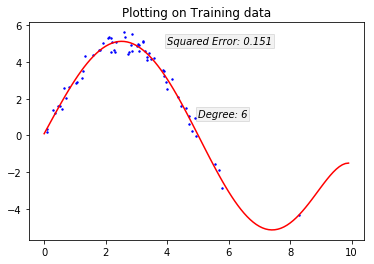

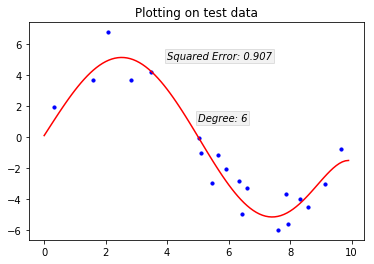

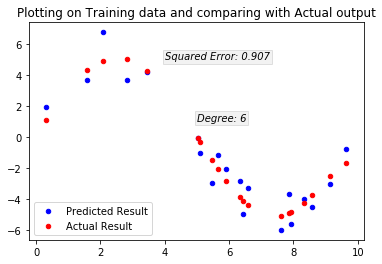

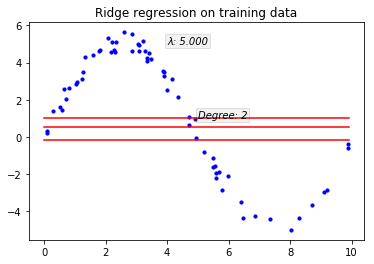

In [9]:

#Question 1.(b) (c)
#Read  data
train_Data,test_Data,x_train,y_train,x_test,y_test,size,x_train_validate,y_train_validate=ReadData()


#Read data for x
x=np.ones((size,1))
x_train_Validate_matrix=np.ones((x_train_validate.shape[0],1))

#read data for Y
train_y=np.array(y_train)

MAX_DEGREE=size

degree=1;
SquaredError=100
w_calculated=None
degree_Polynomial=1;
Overfit_X=None
while degree<100:
    x1=np.array(x_train)**degree
    x= np.concatenate((x,np.reshape(x1,(x1.shape[0],1))),axis=1)
    

    w=CalculateW(x,y_train)
    #calculate mean squared error of the train data
    testerror= CalculateMeanSquaredErrorTestData(x_train_validate,y_train_validate,w)
    
    #In each iteration consider a function which generated least error in training data
    if(SquaredError>testerror  ):
       
        w_calculated=w
        degree_Polynomial=degree
        #storing the X
        Overfit_X=x
        SquaredError=testerror
      
    degree=degree+1
#plot over fitting curve
plotCurve(w_calculated,x_train,y_train,degree_Polynomial,SquaredError) 
plotCurveOnTestData(w_calculated,x_test,y_test,degree_Polynomial) 
print('.................................')
print('Observations For Over Fitting')
print('.................................')
print(' Degree Polynomial:'+str(degree_Polynomial))
print(' Function:'+polynomialFunc(w_calculated))
print('.................................')

#Use ridge regression
Lambda=ridgeRegression(w_calculated,Overfit_X,y_train,x_train_validate,y_train_validate)
x=np.ones((size,1))
train_y=np.array(y_train)
degree=1
degree_Polynomial=1;
CostFuncFinal=10000
while degree<5:
    x1=np.array(x_train)**degree
    x2=np.array(x_train_validate)**degree
    
    x= np.concatenate((x,np.reshape(x1,(x1.shape[0],1))),axis=1)
    x_train_Validate_matrix= np.concatenate((x_train_Validate_matrix,np.reshape(x2,(x2.shape[0],1))),axis=1)
    

    #w=CalculateW(x,y_train)
    print(degree)
    w=FindWByRidgeRegression(Lambda,x,y_train_validate)
    print(w)
    print('fff')
    #calculate mean squared error of the train data
    CostFunctionResult= CostFunction(Lambda,x_train_Validate_matrix,y_train_validate,w)
    print('CostFunctionResult')
    print(CostFunctionResult)
   
    #In each iteration consider a function which generated least error in training data
    if(CostFunctionResult<CostFuncFinal  ):
       
        w_calculated=np.array(w)
        print('w_calculated')
        print(w)
        degree_Polynomial=degree
        #storing the X
        Overfit_X=x
        CostFuncFinal=CostFunctionResult
      
    degree=degree+1

print('.................................')
print('Observations After Using Ridge Regression')
print('.................................')
print(' lambda (λ):'+str(Lambda))
print(' Degree Polynomial:'+str(degree_Polynomial))
print(' Function:'+polynomialFunc(w_calculated))
print('.................................')

#use the lambda (λ) to get a best w for all data  
plotCurveForRidgeRegression(w_calculated,x_train_validate,y_train_validate,x_test,y_test,degree_Polynomial,Lambda) 